# Raw analisys 
---
Here we will do some raw analisys of the data. In particular we are checking errors in the dataset like spelling errors, outliers and Null values.

In [11]:
#Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Importing the dataset

raw_df = pd.read_csv("Train.csv")

In [13]:
#Checking of the data

raw_df.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [14]:
#Overview of the data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                18506 non-null  object 
 1   country                18506 non-null  object 
 2   age_group              18506 non-null  object 
 3   travel_with            17431 non-null  object 
 4   total_female           18504 non-null  float64
 5   total_male             18500 non-null  float64
 6   purpose                18506 non-null  object 
 7   main_activity          18506 non-null  object 
 8   info_source            18506 non-null  object 
 9   tour_arrangement       18506 non-null  object 
 10  package_transport_int  18506 non-null  object 
 11  package_accomodation   18506 non-null  object 
 12  package_food           18506 non-null  object 
 13  package_transport_tz   18506 non-null  object 
 14  package_sightseeing    18506 non-null  object 
 15  pa

We can see that there are some Null values in the feature **travel_with (1075 nan)**, **total_male (4 nan)** **total_female (2 nan)**, and that most of the feature are objects so they need to be transformed into numerical values

In [16]:
#Lengh
lenght = len(raw_df)

#Columns
columns = list(raw_df.columns)

bool_columns = columns[10:17]
bool_columns.append("first_trip_tz")

num_features = [ 'total_female', 'total_male', 'night_mainland','night_zanzibar']

cat_features = ['country','age_group','travel_with','purpose','main_activity','info_source','tour_arrangement']


print("Observations: ", lenght, "\n")
print("Col: ", columns, "\n", len(columns), "\n")
print("Bool: ", bool_columns,"\n", len(bool_columns), "\n" )

Observations:  18506 

Col:  ['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female', 'total_male', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'night_mainland', 'night_zanzibar', 'first_trip_tz', 'cost_category'] 
 21 

Bool:  ['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'first_trip_tz'] 
 8 



In [17]:
#Checking for errors in the data
for column in columns:
    vc = raw_df[column].value_counts()
    print(column.upper(), "\n\n", vc, "\n" + "-"*25 +"\n")

TOUR_ID 

 tour_id1hffseyw    1
tour_idmewz05ax    1
tour_id1r5sg681    1
tour_idadk8knjo    1
tour_id8lpsjwla    1
                  ..
tour_idep32dx46    1
tour_id12ljaxb9    1
tour_idg067w7pf    1
tour_id6qog16mi    1
tour_idceoq9por    1
Name: Tour_ID, Length: 18506, dtype: int64 
-------------------------

COUNTRY 

 UNITED STATES OF AMERICA    2846
UNITED KINGDOM              2120
ITALY                       1625
FRANCE                      1064
GERMANY                      969
                            ... 
ERITREA                        1
NIGER                          1
ESTONIA                        1
CAPE VERDE                     1
JORDAN                         1
Name: country, Length: 131, dtype: int64 
-------------------------

AGE_GROUP 

 25-44    9047
45-64    5648
18-24    2222
65+      1467
<18       122
Name: age_group, dtype: int64 
-------------------------

TRAVEL_WITH 

 Alone                           7590
With Spouse                     4842
With Other Fri


We can see that the dataset is overall clean, no strange values have appeared, and there are also no typo in the features.
At first as made me wonder the maximum of features **total_female** and **total_male**, I initialy thought that it was an outlier but thinking about it as made me realize that those are the numbers of peaple that are traveling togheter, so they must be part of a group travel. Still I'm considering to drop such observation since there are so few, and might be irrelevant to the training of our model. I'll decide with further data exploration, when I'll treat with outlier

Another thing to consider is that our label classes are unbanced. It might need some preparatory adjustment before traing the model


In [18]:
for column in columns:
    uq = raw_df[column].unique()


    print(column.upper(), "\n\n", uq, "\n" + "-"*25 +"\n")

TOUR_ID 

 ['tour_id1hffseyw' 'tour_idnacd7zag' 'tour_id62vz7e71' ...
 'tour_idv7pz3vs8' 'tour_idy6ydo00w' 'tour_idceoq9por'] 
-------------------------

COUNTRY 

 ['ITALY' 'UNITED KINGDOM' 'UNITED STATES OF AMERICA' 'RWANDA' 'FRANCE'
 'SWIZERLAND' 'NIGERIA' 'AUSTRALIA' 'SPAIN' 'DENMARK' 'BELGIUM' 'ZAMBIA'
 'NETHERLANDS' 'CANADA' 'INDIA' 'NORWAY' 'ZIMBABWE' 'MORROCO' 'CHINA'
 'GERMANY' 'SOUTH AFRICA' 'JAPAN' 'UAE' 'RUSSIA' 'KENYA' 'GREECE' 'POLAND'
 'AUSTRIA' 'MALAYSIA' 'CZECH REPUBLIC' 'KOREA' 'DRC' 'CYPRUS' 'KUWAIT'
 'BRAZIL' 'CHILE' 'BULGARIA' 'UNITED ARAB EMIRATES' 'ISRAEL' 'NEW ZEALAND'
 'UGANDA' 'IRELAND' 'SWEDEN' 'QATAR' 'CONGO' 'BURUNDI' 'FINLAND' 'GHANA'
 'OMAN' 'LEBANON' 'LUXEMBOURG' 'IVORY COAST' 'NAMIBIA' 'ROMANIA'
 'THAILAND' 'SUDAN' 'SINGAPORE' 'PORTUGAL' 'MALAWI' 'MALT' 'EGYPT'
 'PAKISTAN' 'TANZANIA' 'ARGENTINA' 'SRI LANKA' 'BOTSWANA' 'VIETNAM'
 'BERMUDA' 'TAIWAN' 'SENEGAL' 'AFGHANISTAN' 'COLOMBIA' 'JAMAICA' 'BAHRAIN'
 'COSTARICA' 'COMORO' 'URUGUAY' 'SAUD ARABIA' 'ETHIO

In [19]:
# Check that all the IDs are unique
if len(raw_df['Tour_ID'].unique()) == lenght:
    print(True)

True


In [218]:
raw_df.describe()

## Exploratory data analysis

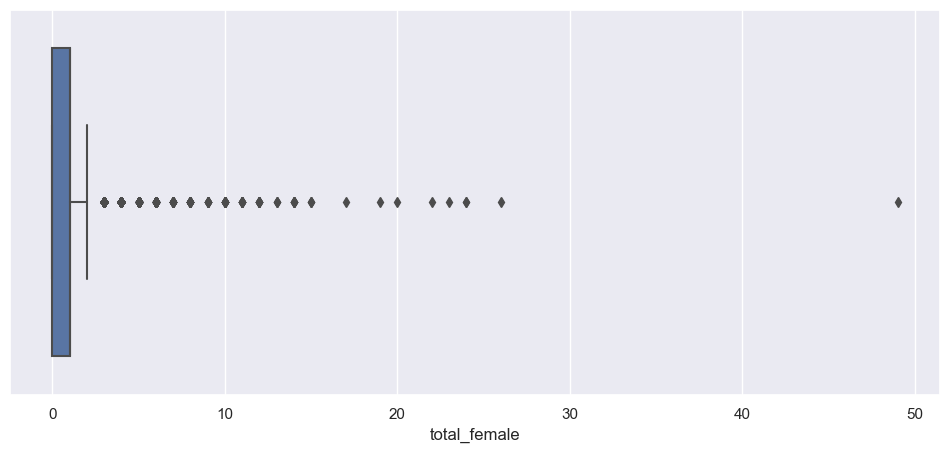

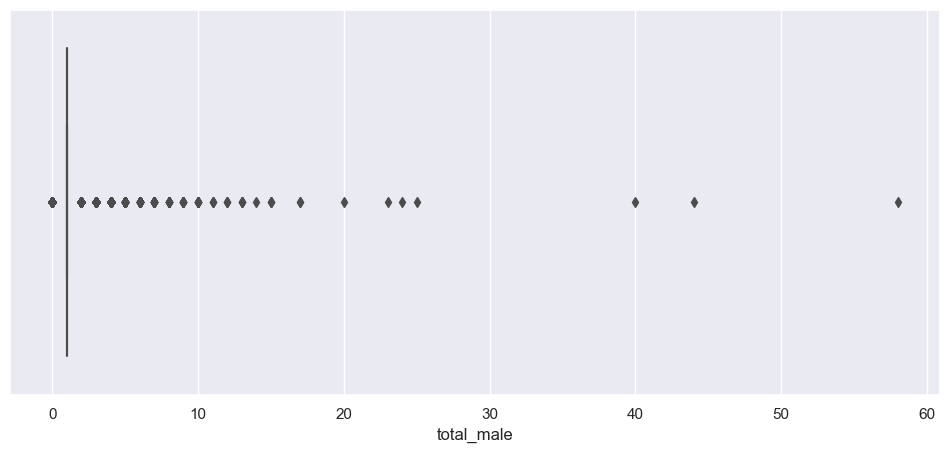

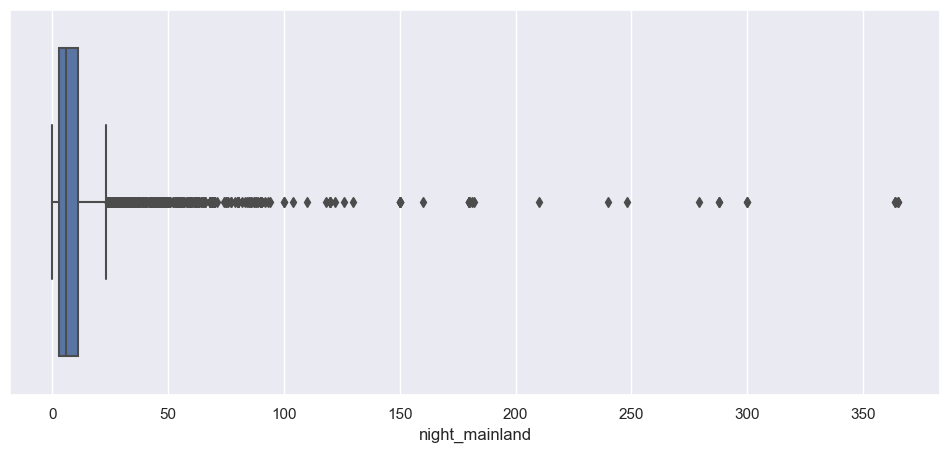

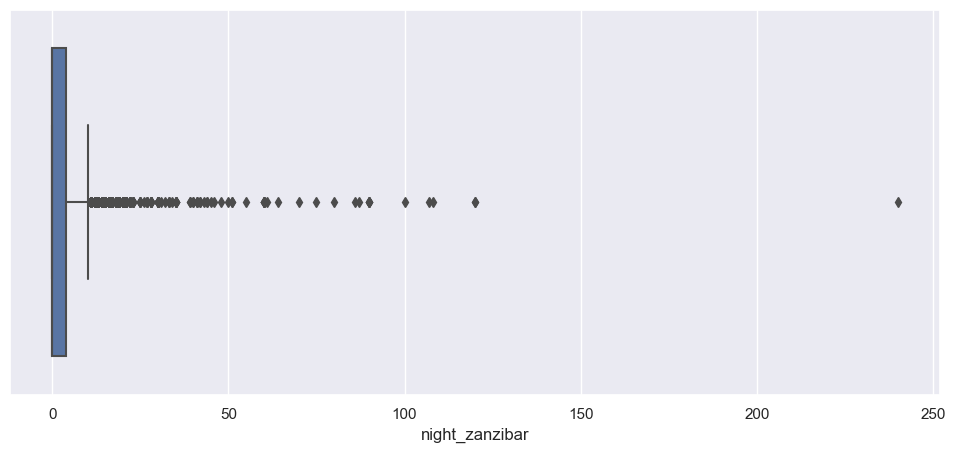

In [20]:
# Numerical Features Exploration
sns.set(rc={'figure.figsize':(12,5)})

for col in num_features:
    ax = sns.boxplot(x=raw_df[col])
    plt.show()

In [21]:
for col in num_features:
    q_2 = raw_df[col].quantile(0.25)
    q_3 = raw_df[col].quantile(0.75)
    IQR =  q_3 - q_2
    outlier = q_3+IQR*1.5

    print(col,outlier)
    print("numero outlier:", raw_df[raw_df[col] > outlier][col].value_counts().sum())

total_female 2.5
numero outlier: 946
total_male 1.0
numero outlier: 2358
night_mainland 23.0
numero outlier: 1148
night_zanzibar 10.0
numero outlier: 729


The number of outliers is big enough to not drop those rows. So we might proceed with the aggregation of those outliers values.

In [25]:
raw_df['country'].value_counts()

UNITED STATES OF AMERICA    2846
UNITED KINGDOM              2120
ITALY                       1625
FRANCE                      1064
GERMANY                      969
                            ... 
ERITREA                        1
NIGER                          1
ESTONIA                        1
CAPE VERDE                     1
JORDAN                         1
Name: country, Length: 131, dtype: int64

In [27]:
count=raw_df['country'].value_counts()
country_below = count[count<50]
list_country_below = list(country_below.index)

print(country_below)
print(list_country_below)
print("number", len(country_below))
print(country_below.sum())

MALAWI                  46
PORTUGAL                46
BRAZIL                  43
CZECH REPUBLIC          40
UNITED ARAB EMIRATES    36
                        ..
ERITREA                  1
NIGER                    1
ESTONIA                  1
CAPE VERDE               1
JORDAN                   1
Name: country, Length: 94, dtype: int64
['MALAWI', 'PORTUGAL', 'BRAZIL', 'CZECH REPUBLIC', 'UNITED ARAB EMIRATES', 'ETHIOPIA', 'SINGAPORE', 'SCOTLAND', 'MEXICO', 'QATAR', 'NIGERIA', 'PAKISTAN', 'MOZAMBIQUE', 'ARGENTINA', 'GREECE', 'ROMANIA', 'SWAZILAND', 'SUDAN', 'PHILIPINES', 'URUGUAY', 'TURKEY', 'LEBANON', 'NAMIBIA', 'SRI LANKA', 'COMORO', 'SAUD ARABIA', 'EGYPT', 'THAILAND', 'SLOVAKIA', 'UKRAIN', 'HUNGARY', 'MAURITIUS', 'BOTSWANA', 'TAIWAN', 'LUXEMBOURG', 'CHILE', 'SERBIA', 'BAHRAIN', 'COLOMBIA', 'VIETNAM', 'MALT', 'KUWAIT', 'INDONESIA', 'GHANA', 'TRINIDAD TOBACCO', 'CROATIA', 'BULGARIA', 'MADAGASCAR', 'CAMEROON', 'ICELAND', 'LATVIA', 'LITHUANIA', 'ALGERIA', 'MORROCO', 'BERMUDA', 'SLOVENIA', 

In [28]:
country = raw_df['country']
country = country.apply(lambda x: "OTHER" if x in list_country_below else x)
country.value_counts()

UNITED STATES OF AMERICA    2846
UNITED KINGDOM              2120
ITALY                       1625
FRANCE                      1064
OTHER                        970
GERMANY                      969
SOUTH AFRICA                 811
KENYA                        781
ZAMBIA                       715
AUSTRALIA                    704
CANADA                       571
ZIMBABWE                     570
UGANDA                       527
SPAIN                        470
INDIA                        408
NETHERLANDS                  381
SWIZERLAND                   278
BELGIUM                      244
SWEDEN                       235
BURUNDI                      231
CHINA                        216
UAE                          187
DENMARK                      178
NORWAY                       151
RWANDA                       145
JAPAN                        137
AUSTRIA                      124
IRELAND                      122
OMAN                          92
POLAND                        84
NEW ZEALAN

## Graphs

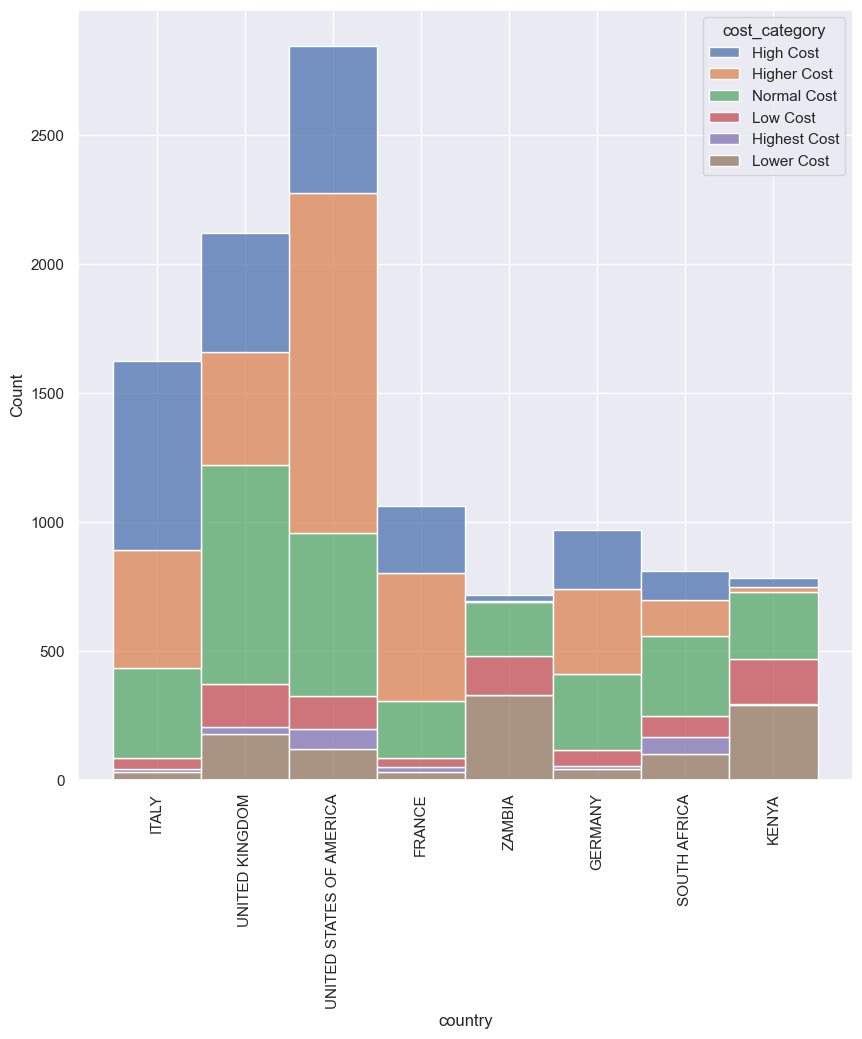

In [29]:
lower_countries_list = raw_df['country'].value_counts()[0:8]
index = list(lower_countries_list.index)
graph = raw_df.copy()

dropping =[]
for c in range(len(graph['country'])):
    if graph['country'].iloc[c] not in index:
        dropping.append(c)
        
for e in dropping:
    graph.drop( e, axis = 0, inplace =True )

sns.set(rc={'figure.figsize':(10,10)})

ax = sns.histplot(data=graph, x="country", hue="cost_category", multiple="stack")
plt.xticks(rotation = 90)
plt.show()

In [30]:
for col in bool_columns:
	raw_df[col] = raw_df[col].apply(lambda x: 1 if x == "Yes" else 0)
                                    
raw_df = raw_df.drop("Tour_ID",axis = 1)
raw_df[cat_features] = raw_df[cat_features].astype('category')
raw_df['cost_category'] = raw_df['cost_category'].astype('category')
raw_df['country'] = country
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   country                18506 non-null  object  
 1   age_group              18506 non-null  category
 2   travel_with            17431 non-null  category
 3   total_female           18504 non-null  float64 
 4   total_male             18500 non-null  float64 
 5   purpose                18506 non-null  category
 6   main_activity          18506 non-null  category
 7   info_source            18506 non-null  category
 8   tour_arrangement       18506 non-null  category
 9   package_transport_int  18506 non-null  int64   
 10  package_accomodation   18506 non-null  int64   
 11  package_food           18506 non-null  int64   
 12  package_transport_tz   18506 non-null  int64   
 13  package_sightseeing    18506 non-null  int64   
 14  package_guided_tour    18506 non-null 

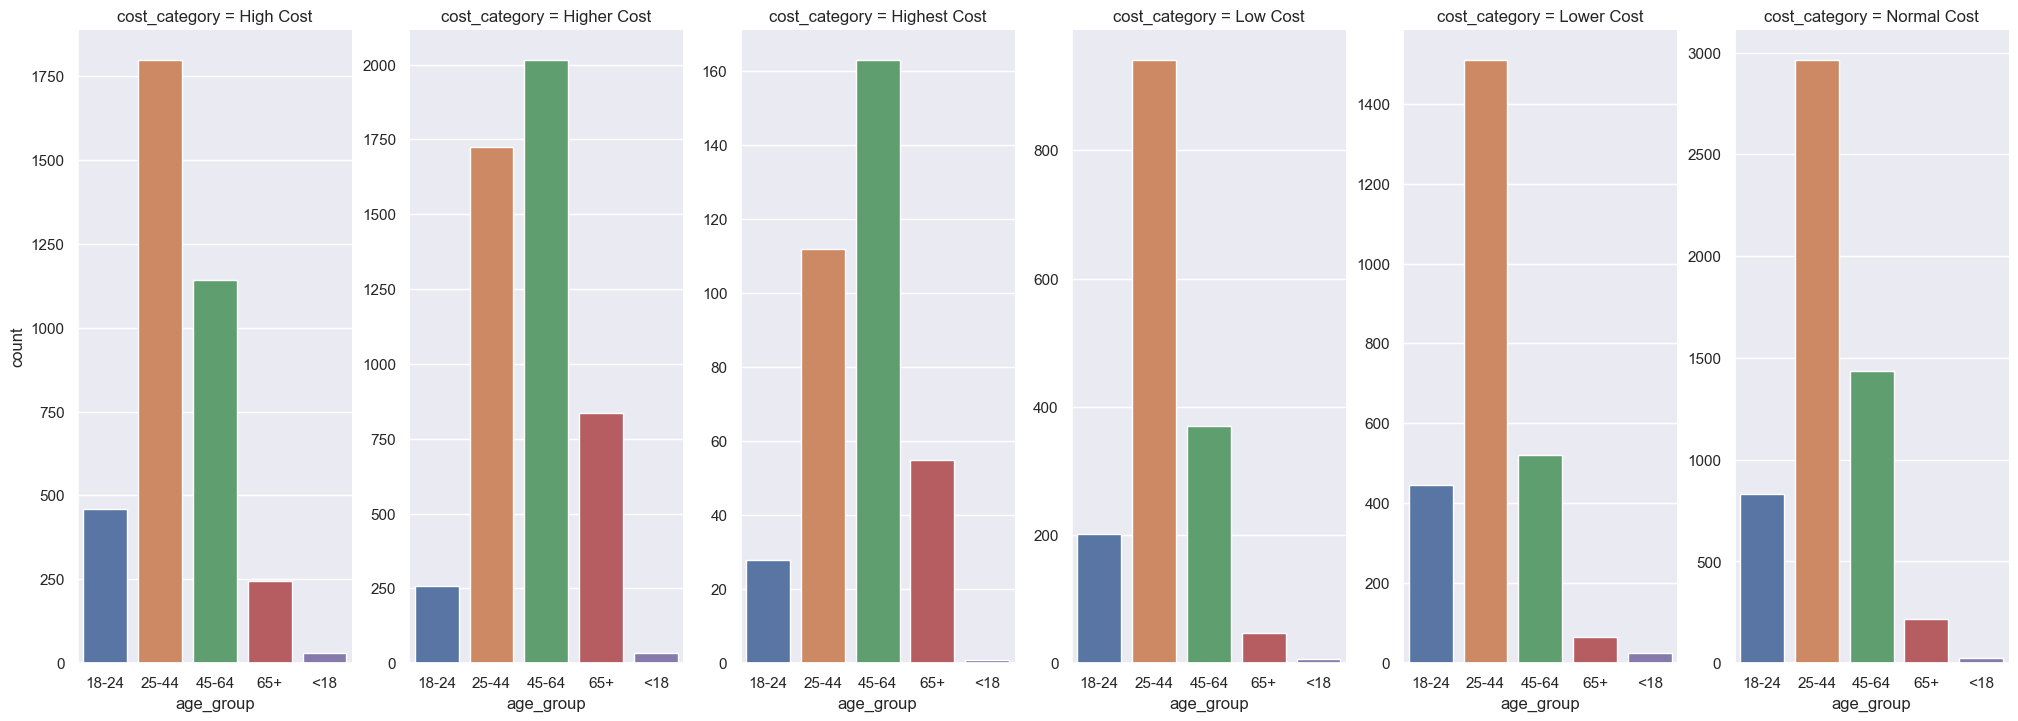

In [43]:
g = sns.catplot(x = 'age_group', kind='count', col = 'cost_category', data=raw_df, sharey=False)
g.figure.set_size_inches(20, 8)
plt.show()

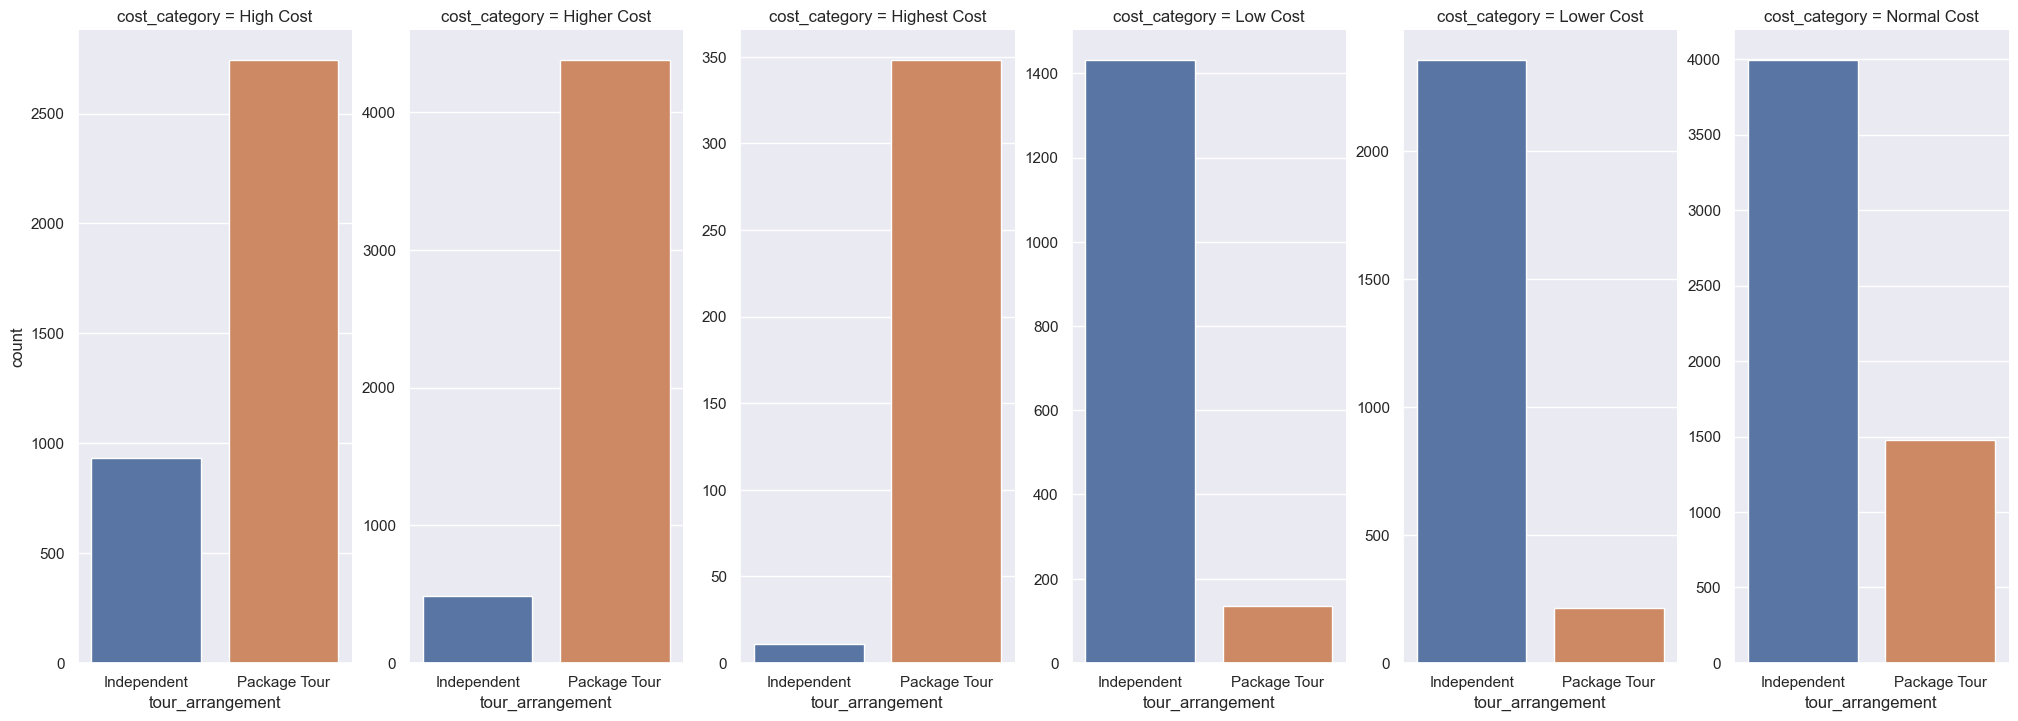

In [44]:
g = sns.catplot(x = 'tour_arrangement', kind='count', col = 'cost_category', data=raw_df, sharey=False)
g.figure.set_size_inches(20, 8)
plt.show()

We have seen that there is an inversion in proportionality between **cost_class** and **tour_arrangement**. Seems right, since those of the upper categories are more likely to come with a Package Tour.
Also those with high **cost_category** are likely to be older, and that makes sense since younger people tend to have less money.

For the preprocessing:
- Removing of the Id Column
- Imputation of missing values
- Outliers handling
- Numerical trasformation of categorical features
- Balancing of the label classes